<a href="https://colab.research.google.com/github/R04425/Project3/blob/main/Project_3_OG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Pip Install

In [ ]:
!pip install requests
!pip install bs4

# Import the Libraries

In [ ]:
import requests
import pandas as pd
import pandas_profiling
import numpy as np
import io
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as ph

# Read the CSV

In [ ]:
# Display the database
# Each row represents an athlete and an event
# Sample of 5 rows only

new_df = pd.read_csv('athlete_events.csv')
new_df.sample(5)
#new_df.shape
#new_df.drop

# Dataset has 271116 rows spread in 15 columns. Let us explore the columns further

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
177252,89117,"Susan ""Susie"" O'Neill",F,18.0,171.0,63.0,Australia,AUS,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 100 metres Freestyle,NaN
258653,129507,Ren Weller,M,22.0,176.0,57.0,West Germany,FRG,1976 Summer,1976,Summer,Montreal,Boxing,Boxing Men's Featherweight,NaN
129202,65037,Karin Knzle,F,21.0,162.0,50.0,Switzerland,SUI,1976 Winter,1976,Winter,Innsbruck,Figure Skating,Figure Skating Mixed Pairs,NaN
148111,74318,Julia Marie Mancuso (-Fish),F,29.0,168.0,64.0,United States,USA,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Downhill,NaN
205179,103017,Luciano Rovere,M,NaN,NaN,NaN,Argentina,ARG,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN


# Pre Processing

In [ ]:
# There is some missing data (NaN) in Age , Height, Weight, Medals, will need to feel this later
# Check the types and atributes
# Uniformize all columns to lower or upper to make it easier for now
# Check all the columns of the DF

new_df.columns = new_df.columns.str.lower()
new_df.info()
new_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')

In [ ]:
# Let's check the duplicates
new_df.duplicated().sum()

# R: 1385 ??

1385

In [ ]:
# It will drop the duplicates rows from the original dataset because of inplace as True.
new_df.drop_duplicates(inplace=True) 
new_df.shape

(269731, 15)

In [ ]:
new_df.duplicated().sum() 
new_df.isnull().sum()
# Now we are ready to work

id             0
name           0
sex            0
age         9315
height     58814
weight     61527
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     229959
dtype: int64

# Filling the Nulls

In [ ]:
# Check the frame without NaN
# Do a for loop to fill NaN columns (age, weight, height) with the mean amount
# We can also do a function

columns = ['age', 'height', 'weight']
for column in columns:
    column_mean = new_df[column].mean()
    new_df[column] = new_df[column].fillna(column_mean)


new_df.head(5)
new_df.round()
# The result is a DataFrame with no NaN but it's ugly as hell :)
# Need to check if we can change the enourmous quantity of 0's in these columns

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Youngest and Oldest Athletes History

In [ ]:
# Now we can start having fun
# What was the youngest athlete of all times? 
# R: A young greek with 10 years old, even won a broze medal

youngest_athlete = new_df.sort_values(by='age', ascending=True)
youngest_athlete.head(1)

# We should definitely webscrap the URL from wikipedia

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
142882,71691,Dimitrios Loundras,M,10.0,175.338953,70.701778,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [ ]:
# What was the oldest Athlete of all times? 
# R: 97 year old american
oldest_athlete = new_df.sort_values(by='age', ascending=False)
oldest_athlete.head(1)

# We should also webscrap the URL from wikipedia

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
257054,128719,John Quincy Adams Ward,M,97.0,175.338953,70.701778,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


# Web Scraping the Youngest and the Oldest


# First Analysis

In [ ]:
# Now let's take some conclusions that may be useful for the project
# Need to find a method to clean the frame better 

new_df.describe()
#df = new_df.describe()
#df.round()
# What do we see? A looot of info

,id,age,height,weight,year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.056501,9.301313,12.606697,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,25.000000,175.338953,70.701778,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:

# Conclusions from this analysis:
# You can check also this in the net. It's straightforward info

# Age
# Around 74% of the Athletes are older than 22
# The Median age is 25
# 75% are younger than 28
# The mean age is 25
# The youngest athlete to ever participate was only 10
# The older athlete to ever participate was 96

# Height
# Around 74% of the Athletes are taller than 169cm
# The Median height is 175cm
# The mean height is 175.33 cm 
# The shortest athlete to ever participate was only 127cm tall
# The tallest athlete to ever participate was 223cm tall

# Weight
# Around 74% of the Athletes weight more than 60kg
# The Median weight is 70kg
# 75% are weight less 76kg
# The mean weight is 70.70kg
# The lightest athlete to ever participate only weighted 25kg
# The heaviest athlete to ever participate had 214kg

# Country & Sports Participation Analysis 

In [ ]:
# OK. Now let's check other info

In [ ]:
# Whats the frequency of Country Participation?
# Display the TOP 20 
# R: USA, FRA AND GBR in TOP 3. Curious right?

new_df.noc.value_counts(dropna=False).head(20)


USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
CAN     9733
JPN     8444
SWE     8339
AUS     7638
HUN     6607
POL     6207
SUI     6150
NED     5839
URS     5685
FIN     5467
ESP     5313
RUS     5143
AUT     5141
CHN     5141
NOR     4960
Name: noc, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TOP 10 COUNTRIES WITH MORE PARTICIPATIONS.')

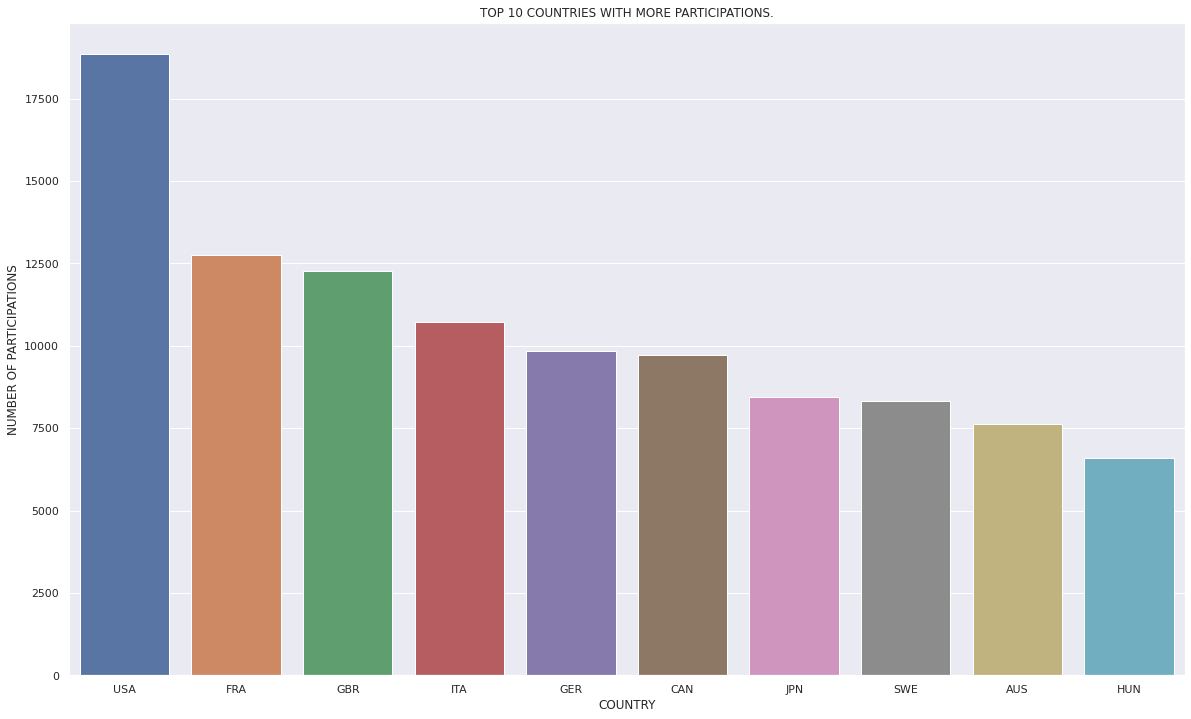

In [ ]:
fig_1 = pd.DataFrame(new_df.noc.value_counts(dropna=False).head(10))
fig_1
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.barplot(fig_1.index,fig_1['noc'])
plt.ylabel('NUMBER OF PARTICIPATIONS')
plt.xlabel('COUNTRY')
plt.title("TOP 10 COUNTRIES WITH MORE PARTICIPATIONS.")

Text(0.5, 1.0, 'TOP 10 COUNTRIES WITH MORE PARTICIPATIONS.')

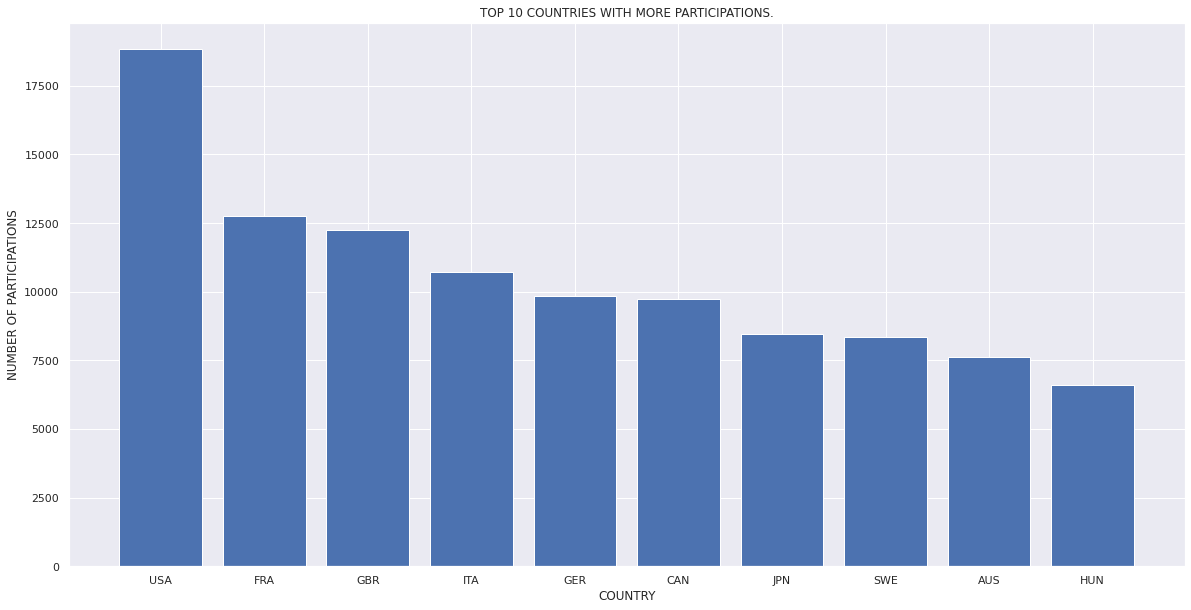

In [ ]:
fig_1 = pd.DataFrame(new_df.noc.value_counts(dropna=False).head(10))
fig_1
plt.figure(figsize = (20,10))
plt.bar(fig_1.index,fig_1['noc'])
plt.ylabel('NUMBER OF PARTICIPATIONS')
plt.xlabel('COUNTRY')
plt.title('TOP 10 COUNTRIES WITH MORE PARTICIPATIONS.')

# R: Missing Russia due to Union Soviet dissolved in 1991

In [ ]:
# What's the frequency of Sport Activity? 
# R: Athletics, Gymnastics and Swimming as TOP 3. It makes sense 

new_df.sport.value_counts(dropna=False).head(20)


Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Football                 6745
Sailing                  6586
Equestrianism            6344
Canoeing                 6171
Boxing                   6047
Speed Skating            5613
Ice Hockey               5516
Hockey                   5417
Biathlon                 4893
Basketball               4536
Name: sport, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TOP 10 SPORTS WITH MORE PARTICIPATIONS')

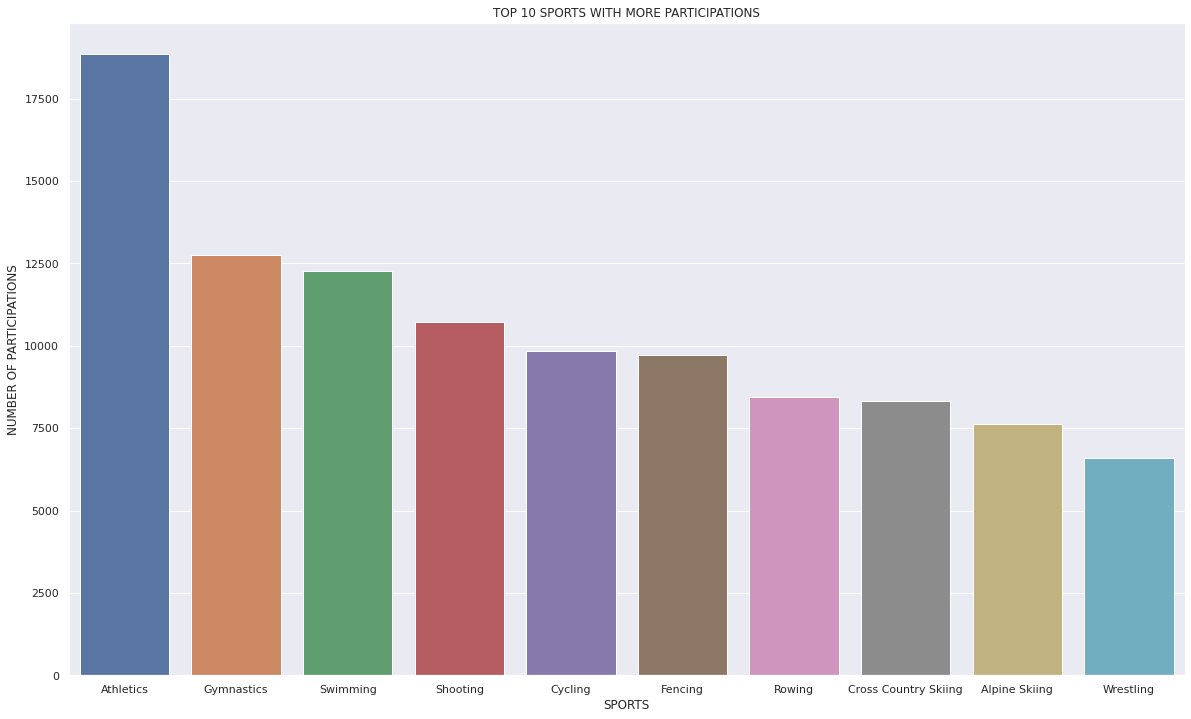

In [ ]:
fig_2 = pd.DataFrame(new_df.sport.value_counts(dropna=False).head(10))
fig_2
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.barplot(fig_2.index,fig_1['noc'])
plt.ylabel('NUMBER OF PARTICIPATIONS')
plt.xlabel('SPORTS')
plt.title('TOP 10 SPORTS WITH MORE PARTICIPATIONS.')

Text(0.5, 1.0, 'TOP 10 SPORTS WITH MORE PARTICIPATION.')

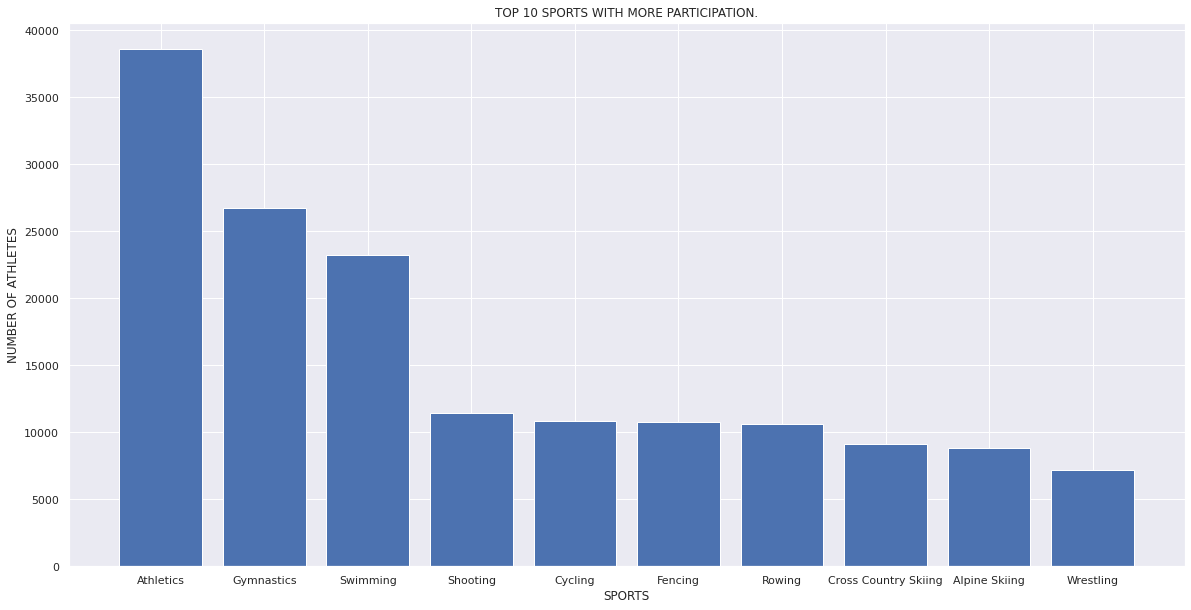

In [ ]:
plt.figure(figsize = (20,10))
plt.bar(fig_2.index,fig_2['sport'])
plt.ylabel('NUMBER OF ATHLETES')
plt.xlabel('SPORTS')
plt.title('TOP 10 SPORTS WITH MORE PARTICIPATION.')



In [ ]:
# How many countries participated in each Olympics?
new_df.groupby('year').nunique()[['noc']]

,noc
year,
1896,12
1900,31
1904,15
1906,21
1908,22
1912,29
1920,29
1924,46
1928,46


Text(0.5, 1.0, 'NUMBER OF COUNTRIES PARTICIPATION LEVEL IN OLYMPICS OVER THE HISTORY.')

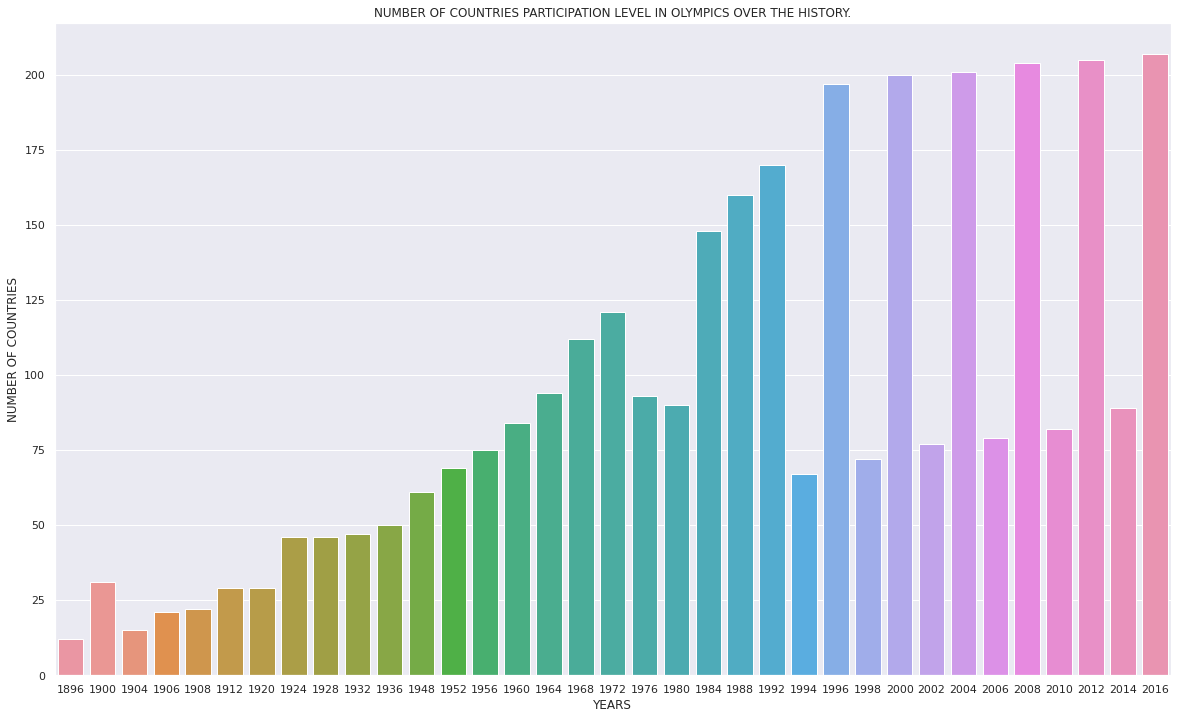

In [ ]:
groupYearCountry = new_df.groupby('year').nunique()[['noc']].reset_index()
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.barplot(x='year',y='noc',data=groupYearCountry)
plt.xlabel("YEARS")
plt.ylabel("NUMBER OF COUNTRIES")
plt.title("NUMBER OF COUNTRIES PARTICIPATION LEVEL IN OLYMPICS OVER THE HISTORY.")

# R: 1994 WINTER OLYMPIC GAMES BECOME BINARY WITH 50% LESS COUNTRIES

# Host Analysis


In [ ]:
# How many times Olympics games hosted till date and which country hosted the maximum Olympics games?
print("Number of times the Olympics has been hosted since 1896:",len(pd.unique(new_df['games'])))
print("Number of Distinct cities hosted the games: ",new_df["city"].nunique())

Number of times the Olympics has been hosted since 1896: 51
Number of Distinct cities hosted the games:  42


In [ ]:
# Which Cities hosted the Olympics more times ?

print(new_df.loc[:, ['year', 'city']].drop_duplicates()['city'].value_counts().sort_values(ascending=False).head(5))

# R: London, Athina, Lake Placid ??

London       3
Athina       3
Innsbruck    2
Paris        2
Stockholm    2
Name: city, dtype: int64


In [ ]:
# Which Cities has hosted the Olympics more than one time ?

host_city = new_df.loc[:, ['year', 'city']].drop_duplicates()["city"].value_counts(ascending=False).rename_axis('city').to_frame('count')
host_city = host_city[host_city["count"]>1].reset_index()

host_city

,city,count
0,London,3
1,Athina,3
2,Innsbruck,2
3,Paris,2
4,Stockholm,2
5,Sankt Moritz,2
6,Lake Placid,2
7,Los Angeles,2


Text(0.5, 1.0, 'Cities that hosted the Olympic Games more than once.')

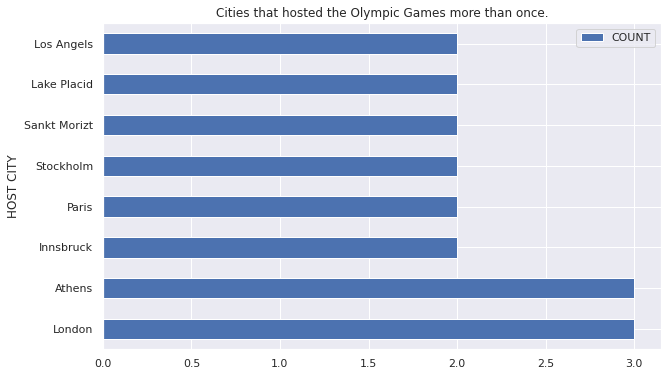

In [ ]:
# Which Cities has hosted the Olympics more than one time ?
# Let's display a couple of charts

sns.set(rc={'figure.figsize':(10,6)})
ax = pd.DataFrame({'HOST CITY': ['London', 'Athens', 'Innsbruck', 'Paris', 'Stockholm', 'Sankt Morizt', 'Lake Placid', 'Los Angels'], 'COUNT': [3, 3, 2, 2, 2, 2, 2, 2]})
ax = ax.plot.barh(x='HOST CITY', y='COUNT')
plt.title('Cities that hosted the Olympic Games more than once.')



Text(0.5, 1.0, 'Cities that hosted the Olympics Games more than once.')

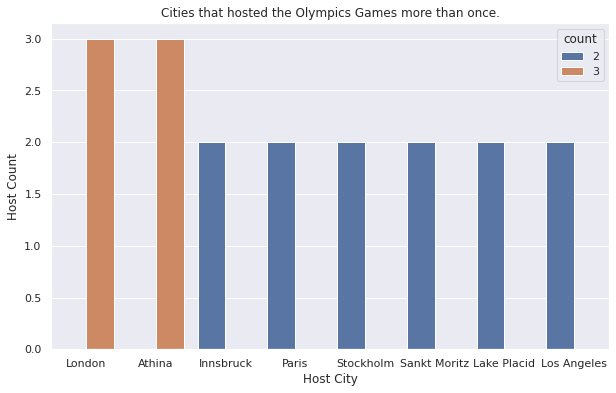

In [ ]:
fig = plt.figure(figsize=(10, 6))

ax=sns.barplot(data=host_City,x='city',y='count',hue='count')
ax.set(xlabel='Host City', ylabel='Host Count')
plt.xlabel('Host City')
plt.ylabel('Host Count')
plt.title('Cities that hosted the Olympics Games more than once.')


# Medal Analysis

In [ ]:
# Let's do a Medal Analysis
# First we need to feel the NULL which means NO medal was won = Lost

new_df['medal'].fillna('Lost',inplace=True)
new_df.head(5)

# Way better now :)   

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Lost
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Lost
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Lost
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Lost


In [ ]:
# Let's check if all go well and if we finally have NO NULLS

new_df.isnull().sum()  

id        0
name      0
sex       0
age       0
height    0
weight    0
team      0
noc       0
games     0
year      0
season    0
city      0
sport     0
event     0
medal     0
dtype: int64

In [ ]:
# Let's create a new DF just with the medals Gold, Silver, Bronze
winners_table = new_df[new_df.medal != 'Lost']
winners_table.head(10)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.00000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,17,Paavo Johannes Aaltonen,M,32.0,175.00000,64.000000,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [ ]:
# Now we can check which country won the maxmium number of medals

medal = winners_table[winners_table['medal']!='Lost'].groupby('noc')['medal'].count()
medal = pd.DataFrame(data=medal)
#medal.reset_index(inplace=True)
medal.sort_values(by='medal')
medal.plot(kind='bar',x='noc',y='medal',figsize=(30,15))
plt.ylabel('TOTAL MEDALS')
plt.xlabel('COUNTRY')
plt.get_cmap('Spectral')

# This graph is hugeee as hell
# We need to do something about the massive info of countries
# Conclusions: US with the most medals followed by the old URS, Germany, GRB and France

KeyError: ignored

In [ ]:
# What about Portugal ?
# Let's check the in which sports PT won medals
# What about Venezuela ? We can't forget that country as well :)
# Let's also check the in which sports Venezuela won medals

Portugal = winners_table[(winners_table['noc']=='POR') & (winners_table['medal']!='NaN')]['sport'].value_counts()
Venezuela = winners_table[(winners_table['noc']=='VEN') & (winners_table['medal']!='NaN')]['sport'].value_counts()



In [ ]:
pt_winners = winners_table.loc[winners_table['team'] == 'Portugal']
#pt_winners['medal'].count() 

vz_winners = winners_table.loc[winners_table['team'] == 'Venezuela']
#vz_winners['medal'].count() 


print("Number of Medals that Portugal has won since 1896:",pt_winners['medal'].count())
print("Number of Medals that Venezuela has won since 1896:",vz_winners['medal'].count())


Number of Medals that Portugal has won since 1896: 35
Number of Medals that Venezuela has won since 1896: 15


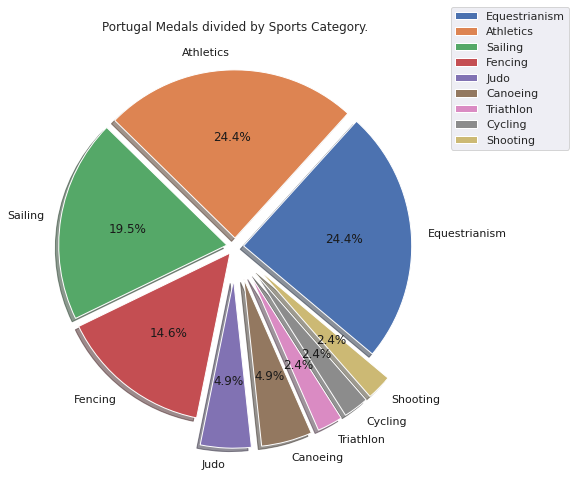

In [ ]:
Portugal = pd.DataFrame(data=Portugal)
plt.figure(figsize=(8,8))
plt.pie(x=Portugal['sport'],autopct='%1.1f%%',textprops=dict(color="k"),labels=Portugal.index,shadow=True,startangle=320,explode=(0.05,0.05,0.05,0.05,0.2,0.2,0.2,0.2,0.2))
plt.legend(loc='center left',bbox_to_anchor=(1,0.9))
plt.title('Portugal Medals divided by Sports Category.')
plt.tight_layout()

# R: Boring sports :)

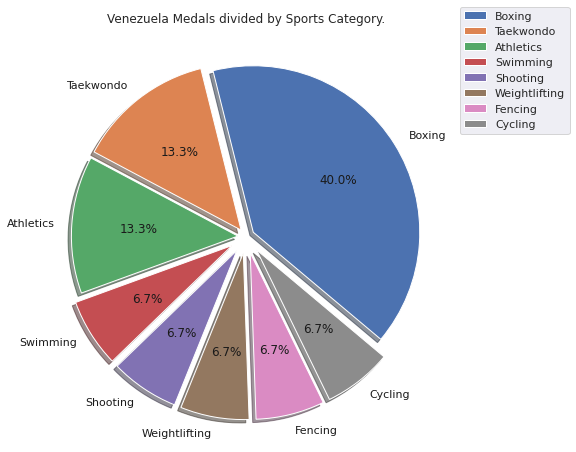

In [ ]:
Venezuela = pd.DataFrame(data=Venezuela)
plt.figure(figsize=(8,8))
plt.pie(x=Venezuela['sport'],autopct='%1.1f%%',textprops=dict(color="k"),labels=Venezuela.index,shadow=True,startangle=320,explode=(0.05,0.05,0.05,0.1,0.1,0.1,0.1,0.1))
plt.legend(loc='center left',bbox_to_anchor=(1,0.9))
plt.title('Venezuela Medals divided by Sports Category.')
plt.tight_layout()

# R: Boxing the sport with more medals cool :)

# Male Vs Female Analysis

Text(0.5, 1.0, 'Comparing the Age for Male and Female Athletes.')

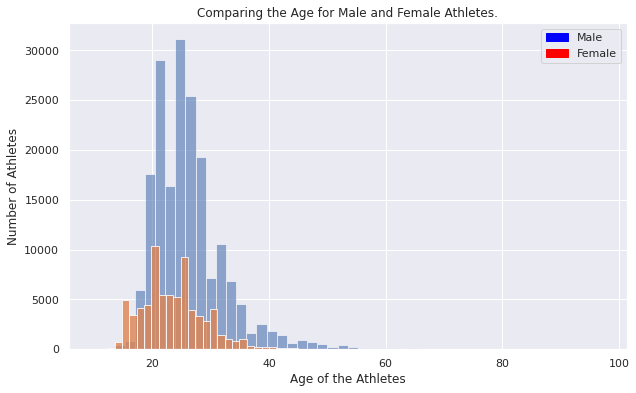

In [ ]:
# Let's check difference between the age of the Male and Female athletes

sns.set_theme()
plt.figure(figsize=(10,6))
new_df[new_df['sex']=='M']['age'].plot(kind='hist',alpha=.6,bins=50)
new_df[new_df['sex']=='F']['age'].plot(kind='hist',alpha=.8,bins=50)
plt.legend(handles=[lg1,lg2])
plt.ylabel('Number of Athletes')
plt.xlabel('Age of the Athletes')
plt.title("Comparing the Age for Male and Female Athletes.")

Text(0.5, 1.0, 'Percentage of Male and Female Athletes in the Olympic Games History.')

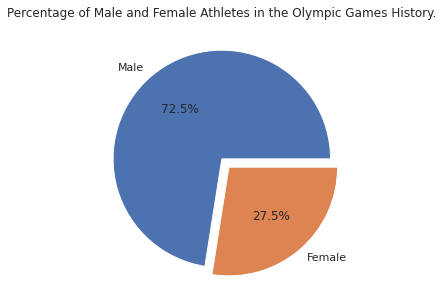

In [ ]:
# Let's check the percentage of male and female athletes in Olympics Games history
plt.figure(figsize=(5,5))
plt.pie(x=new_df['sex'].value_counts(),autopct='%1.1f%%',explode=(0,0.1),labels=['Male','Female'])
plt.title('Percentage of Male and Female Athletes in the Olympic Games History.')


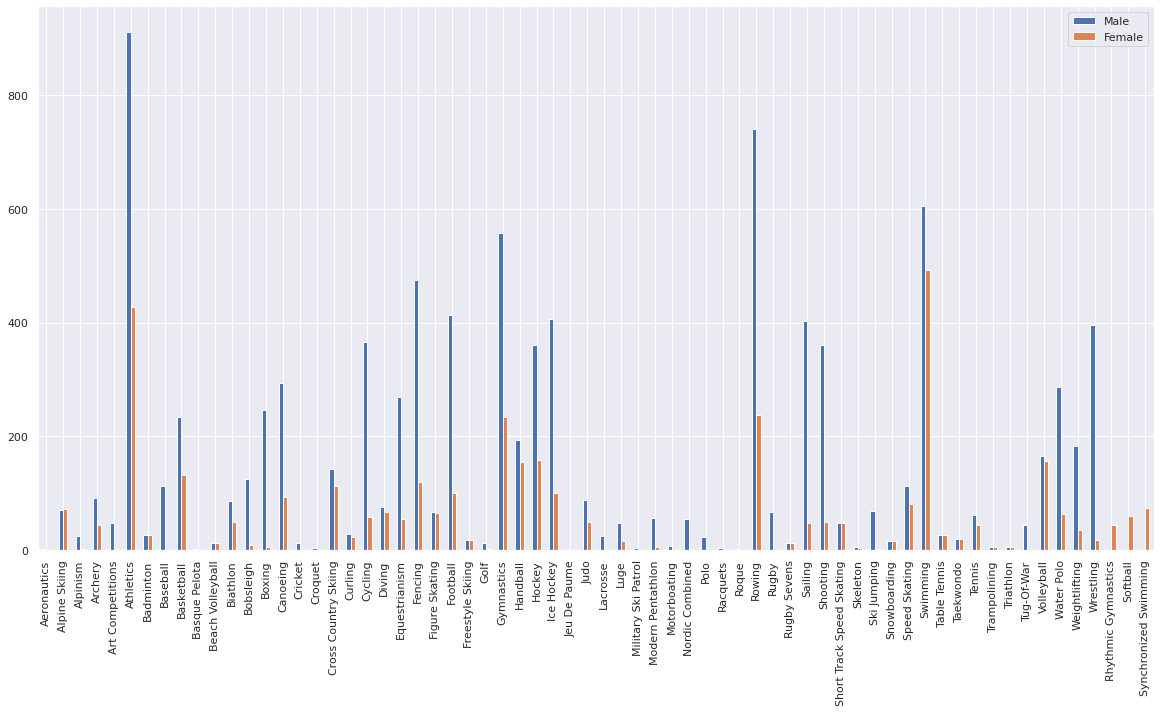

In [ ]:
# Lets check Male Vs Female 
# In which sports Male had won Gold in comparison to Female?

Male = new_df[(new_df['sex']=='M') & (new_df['medal']=='Gold')].groupby('sport')['medal'].count()
Female = new_df[(new_df['sex']=='F') & (new_df['medal']=='Gold')].groupby('sport')['sex'].count()
Male = pd.DataFrame(data=Male)
Female = pd.DataFrame(data=Female)
Comparison = pd.concat([Male,Female],axis=1)
Comparison.rename(columns={'medal':'Male','sex':'Female'},inplace=True)
Comparison.plot(kind='bar',figsize=(20,10))

# R: Women are getting good at Swimming Sports

In [ ]:
# Let's create a filtered Female database
Women_In_Olympics = new_df[new_df.sex != 'M']
Women_In_Olympics.head(5)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


Text(0.5, 1.0, 'Women medals per edition of the Olympic Games.')

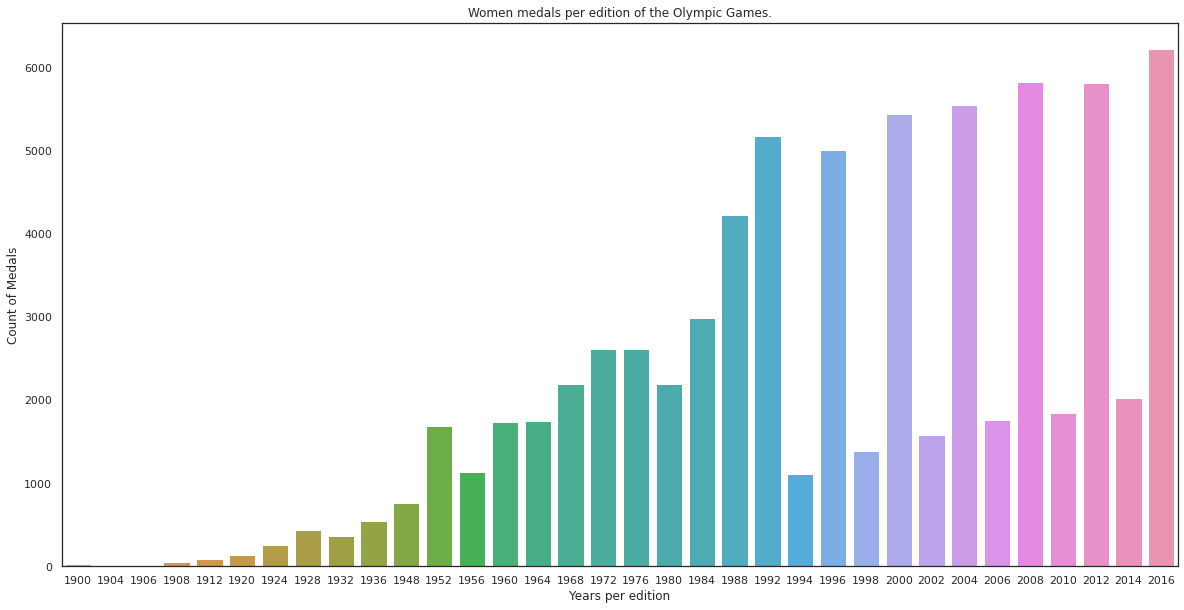

In [ ]:
# Let's check the evolution of Medals over time

sns.set(style="white")
plt.figure(figsize=(20, 10))
sns.countplot(x='year', data=Women_In_Olympics)
plt.xlabel('Years per edition')
plt.ylabel('Count of Medals')
plt.title('Women medals per edition of the Olympic Games.')

# Agin the plot curve is downsized 

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

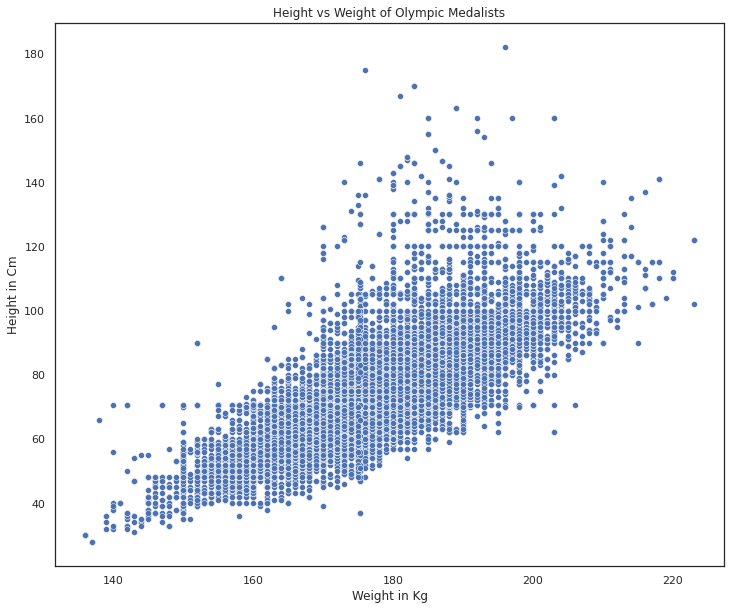

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="height", y="weight", data=winners_table)
plt.xlabel('Weight in Kg')
plt.ylabel('Height in Cm')
plt.title('Height vs Weight of Olympic Medalists')